# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
pd.DataFrame(df.data , columns=df.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
dataset = pd.DataFrame(df.data , columns=df.feature_names)

In [7]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dataset['price'] = df.target

In [9]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
##independent and dependent features
x = dataset.iloc[:,:-1] #independent features
y = dataset.iloc[:,-1]  #dependent features

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()  #just initialising the object

In [13]:
regressor

LinearRegression()

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(regressor,x,y,scoring='neg_mean_squared_error',cv=5)

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [16]:
mse = cross_val_score(regressor,x,y,scoring='neg_mean_squared_error',cv=5)

In [17]:
np.mean(mse)

-37.13180746769922

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
ridge = Ridge()

In [21]:
ridge

Ridge()

In [22]:
parameters = {'alpha' : [1e-10,1e-8,1e-5,1e-1,10,20,30,40]}

In [23]:
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [24]:
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.1, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)

{'alpha': 40}


In [26]:
print(ridge_regressor.best_score_)

-31.15202998955515


# Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
lasso = Lasso()

In [29]:
lasso

Lasso()

In [30]:
parameters = {'alpha' : [1e-10,1e-8,1e-5,1e-1,10,20,30,40]}

In [31]:
lasso_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

In [32]:
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.1, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [33]:
print(lasso_regressor.best_params_)

{'alpha': 40}


In [34]:
print(lasso_regressor.best_score_)

-31.15202998955515


In [35]:
##Elastic net assignment

# Predictions

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [38]:
prediction_lasso = lasso_regressor.predict(x_test)
prediction_ridge = ridge_regressor.predict(x_test)

In [39]:
import seaborn as sns

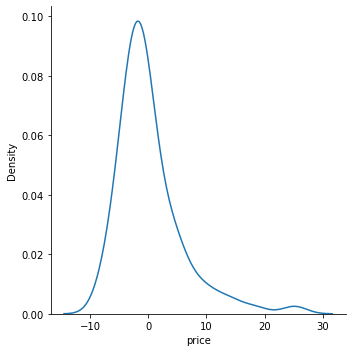

In [42]:
sns.displot(y_test - prediction_lasso,kind='kde')  #displot-distance plot, ytest having truth value

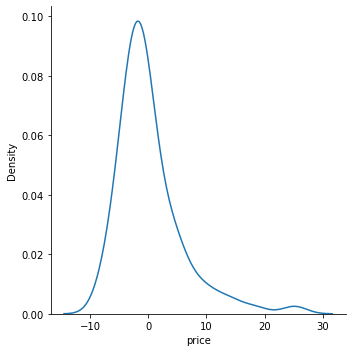

In [43]:
sns.displot(y_test - prediction_ridge,kind='kde') #Error=y_test-prediction_ridge(all error falling between -10 to 10)

# Rsquare and adjusted Rsquare

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,prediction_lasso) #y_true = y_test , y_predicton = prediction lasso

0.6500519409527569

In [46]:
r2_score(y_test,prediction_ridge)    #ans = 65%

0.6500519409527569